In [1]:
from os.path import expanduser, join, split, basename

In [2]:
data_dir = join(expanduser('~'), 'data', 'gta', 'velocity_prediction')

In [3]:
from glob import glob

In [4]:
npz_files = glob(join(data_dir, '*.npz'), recursive=True)
npz_files

['C:\\Users\\tom\\data\\gta\\velocity_prediction\\2021-09-07-22-32-30-gtav_recording.npz',
 'C:\\Users\\tom\\data\\gta\\velocity_prediction\\2021-09-07-22-36-53-gtav_recording.npz']

In [5]:
bin_files = glob(join(data_dir, '*.bin'), recursive=True)
bin_files

['C:\\Users\\tom\\data\\gta\\velocity_prediction\\GTA_recording-209689-truncated.bin',
 'C:\\Users\\tom\\data\\gta\\velocity_prediction\\GTA_recording-209689.bin',
 'C:\\Users\\tom\\data\\gta\\velocity_prediction\\GTA_recording-209948-truncated.bin',
 'C:\\Users\\tom\\data\\gta\\velocity_prediction\\GTA_recording-209948.bin']

In [6]:
test_binfiles = [l for l in bin_files if 'truncated' in l]

In [7]:
test_binfiles

['C:\\Users\\tom\\data\\gta\\velocity_prediction\\GTA_recording-209689-truncated.bin',
 'C:\\Users\\tom\\data\\gta\\velocity_prediction\\GTA_recording-209948-truncated.bin']

In [8]:
def get_t0(fname):
    try:
        return int(basename(fname).replace('.bin', '').split('-')[-1])
    except ValueError:
        return False

In [9]:
bin_fnames_by_t0 = {
    get_t0(fname): fname
    for fname in bin_files
    if get_t0(fname)
}
bin_fnames_by_t0

{209689: 'C:\\Users\\tom\\data\\gta\\velocity_prediction\\GTA_recording-209689.bin',
 209948: 'C:\\Users\\tom\\data\\gta\\velocity_prediction\\GTA_recording-209948.bin'}

In [10]:
import numpy as np, matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [11]:
dat1 = np.load(npz_files[0], allow_pickle=True)

In [12]:
dat2 = np.load(npz_files[1], allow_pickle=True)

In [13]:
from sys import path

In [14]:
path.append(join('..', 'src'))

In [15]:
import gta.read_entitystate_data

In [16]:
def pair_imgdata_with_trackdata(image_npz_loaded):
    t0_img = image_npz_loaded['X'][0][0]
    t0_options = np.array(list(bin_fnames_by_t0.keys()))
    argbest = np.argmin(np.abs(t0_options - t0_img))
    bin_fname = bin_fnames_by_t0[t0_options[argbest]]
    return gta.read_entitystate_data.TrackManager(gta.read_entitystate_data.read_data(bin_fname))
# track_manager = pair_imgdata_with_trackdata(dat1)

..\src\gta\read_entitystate_data.py:183: UserWarning: Larger byte skip encountered (8 bytes).
  warn('Larger byte skip encountered (%d bytes).' % (skip_size,))
..\src\gta\read_entitystate_data.py:183: UserWarning: Larger byte skip encountered (59 bytes).
  warn('Larger byte skip encountered (%d bytes).' % (skip_size,))
..\src\gta\read_entitystate_data.py:241: UserWarning: Some problems encountered while reading file:
        - Skipped forward 11757 times (12471 cumulative bytes from 4868159 bytes total, or 0.26%).
        - 11714 packets had checksum failures (19.30%).
        - 43 packets failed validation despite valid checksum (0.07%).
  warn(msg)


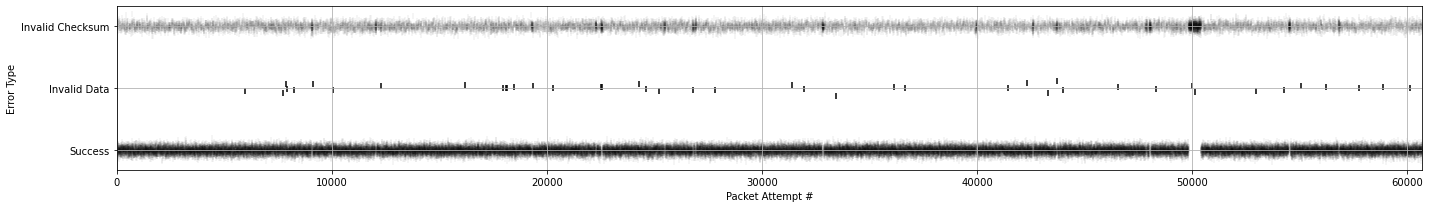

In [17]:
track_manager1 = gta.read_entitystate_data.TrackManager(
    gta.read_entitystate_data.read_data(
        test_binfiles[0]
    )
)

..\src\gta\read_entitystate_data.py:241: UserWarning: Some problems encountered while reading file:
        - Skipped forward 45834 times (49999 cumulative bytes from 22064247 bytes total, or 0.23%).
        - 45663 packets had checksum failures (16.59%).
        - 164 packets failed validation despite valid checksum (0.06%).
  warn(msg)


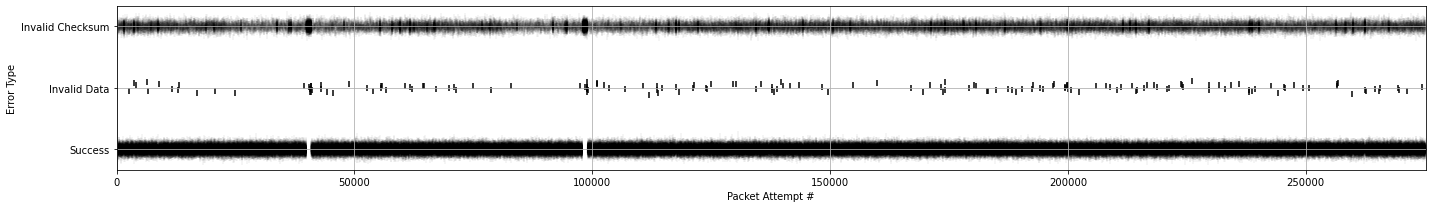

In [75]:
track_manager2 = gta.read_entitystate_data.TrackManager(
    gta.read_entitystate_data.read_data(
        test_binfiles[1]
    )
)

In [78]:
test_binfiles[1]

'C:\\Users\\tom\\data\\gta\\velocity_prediction\\GTA_recording-209948-truncated.bin'

In [80]:
track_manager1.player_veh.duration

..\src\gta\read_entitystate_data.py:494: UserWarning: Multiple <function TrackManager.player_veh.<locals>.<lambda> at 0x0000027A43E70948> tracks found. Using the longest one. 
  "Multiple %s tracks found. Using the longest one. " % test


10.35808099998394

In [81]:
track_manager2.player_veh.duration

..\src\gta\read_entitystate_data.py:494: UserWarning: Multiple <function TrackManager.player_veh.<locals>.<lambda> at 0x0000027A43E70798> tracks found. Using the longest one. 
  "Multiple %s tracks found. Using the longest one. " % test


31.071251999994274

..\src\gta\read_entitystate_data.py:494: UserWarning: Multiple <function TrackManager.player_veh.<locals>.<lambda> at 0x0000027A43E705E8> tracks found. Using the longest one. 
  "Multiple %s tracks found. Using the longest one. " % test


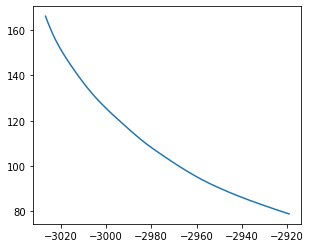

In [82]:
x = track_manager1.player_veh._get_data('posx')
y = track_manager1.player_veh._get_data('posy')
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_aspect('equal')

..\src\gta\read_entitystate_data.py:494: UserWarning: Multiple <function TrackManager.player_veh.<locals>.<lambda> at 0x0000027A413D0438> tracks found. Using the longest one. 
  "Multiple %s tracks found. Using the longest one. " % test
..\src\gta\read_entitystate_data.py:494: UserWarning: Multiple <function TrackManager.player_veh.<locals>.<lambda> at 0x0000027A413D05E8> tracks found. Using the longest one. 
  "Multiple %s tracks found. Using the longest one. " % test


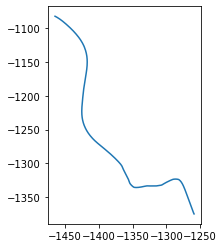

In [83]:
x = track_manager2.player_veh._get_data('posx')
y = track_manager2.player_veh._get_data('posy')
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_aspect('equal')

In [84]:
t, img = dat1['X'][0]

In [85]:
t

209694.578

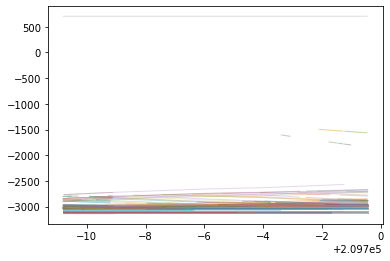

In [86]:
fig, ax = plt.subplots()
for track in track_manager1.tracks:
    ax.plot(track.times, track._get_data('posx'), alpha=.25, linewidth=1)

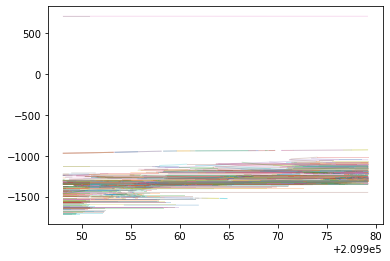

In [87]:
fig, ax = plt.subplots()
for track in track_manager2.tracks:
    ax.plot(track.times, track._get_data('posx'), alpha=.25, linewidth=1)

In [88]:
active_tracks = track_manager1.get_active_tracks(t)

In [89]:
import cv2, PIL

In [90]:
img.shape

(1200, 1600, 3)

In [91]:
track = active_tracks[0]

In [92]:
Ttrack = track.times

In [93]:
screenx = track._get_data('screenx')

In [94]:
t0 = Ttrack[0]

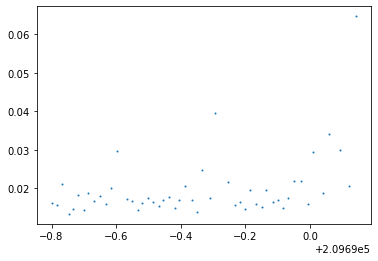

In [95]:
fig, ax = plt.subplots()
# dTtrack = np.diff(Ttrack)

a = Ttrack[track._nonduplicate_time_indices]
# b = dTtrack[track._nonduplicate_time_indices[:-1]]
b = np.diff(a)
c = screenx[track._nonduplicate_time_indices]
# ax.scatter(a[a<t0+1], c[a<t0+1], s=1)

ax.scatter(a[a<t0+1], b[(a<t0+1)[:-1]], s=1)

In [96]:
#track.get('screenx', t)

In [97]:
t

209694.578

In [98]:
track.get('screenx', t)

-1.0

In [115]:
dat1['X'].shape, dat1['X'].dtype

((576, 2), dtype('O'))

In [116]:
dat1['X']

array([[209694.578,
        array([[[178, 196, 221],
        [178, 196, 221],
        [178, 196, 221],
        ...,
        [174, 192, 220],
        [174, 192, 220],
        [174, 192, 220]],

       [[178, 196, 221],
        [178, 196, 221],
        [178, 196, 221],
        ...,
        [174, 192, 221],
        [174, 192, 221],
        [174, 192, 221]],

       [[178, 196, 221],
        [178, 196, 221],
        [178, 196, 221],
        ...,
        [174, 192, 221],
        [174, 192, 221],
        [174, 192, 221]],

       ...,

       [[ 80,  80,  71],
        [ 81,  90,  80],
        [ 86, 108,  95],
        ...,
        [102,  96,  82],
        [101,  96,  82],
        [101,  97,  83]],

       [[ 85,  81,  72],
        [ 89,  93,  80],
        [ 95, 108,  94],
        ...,
        [101,  98,  83],
        [ 99,  98,  84],
        [ 98,  99,  85]],

       [[100,  85,  75],
        [105,  95,  83],
        [107, 109,  93],
        ...,
        [101,  99,  85],
        [ 98,  99,  8

In [104]:
print(track_manager1.tmin, track_manager1.tmax)
print(dat1['X'][0][0], dat1['X'][-1][0])

209689.200851 209699.559328
209694.578 209790.593


In [103]:
print(track_manager2.tmin, track_manager2.tmax)
print(dat2['X'][0][0], dat2['X'][-1][0])

209948.09425 209979.166157
209958.109 210055.0


In [105]:
track_manager1.tmin, track_manager1.tmax, t

(209689.200851, 209699.559328, 209694.578)

In [106]:
track_manager1.get_active_tracks(dat1['X'][0][0])

In [107]:
track_manager1.get_active_tracks(dat1['X'][-1][0])

[]

In [ ]:
img_t0 = dat2['X'][0][0]

In [113]:
t, img = dat2['X'][10]

t - img_t0

0.0

124 tracks


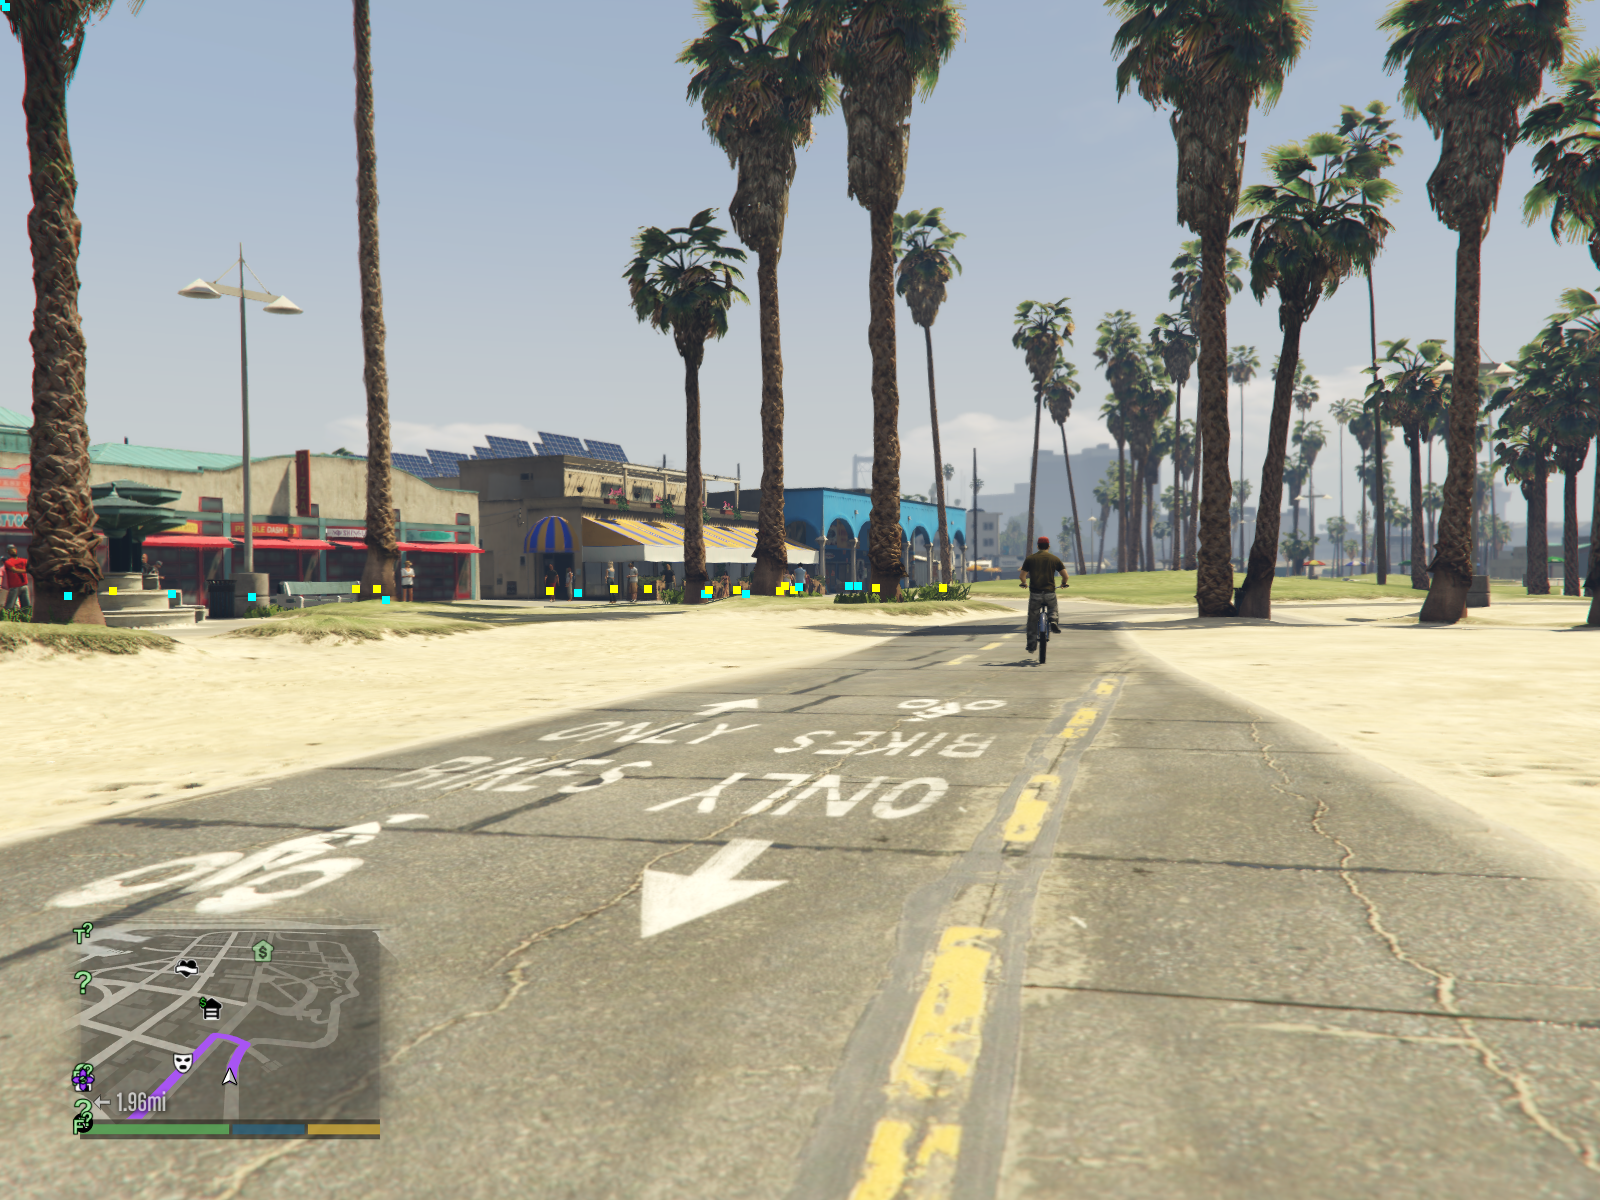

In [114]:
img_dots = np.copy(img)
active_tracks = track_manager2.get_active_tracks(t)
print(len(active_tracks), 'tracks')


for track in active_tracks:
#     screenx = track._get_data('screenx')[0]
#     screeny = track._get_data('screeny')[0]
#     occluded = track._get_data('occluded')[0]
    offset = 0
    if t+offset > track.tmax or t+offset < track.tmin:
        continue
    screenx = track.get('screenx', t+offset)
    screeny = track.get('screeny', t+offset)
    occluded = track.get('occluded', t+offset)
    if screenx != -1 and screeny != -1:
        r = int(img_dots.shape[0]*screeny)
        c = int(img_dots.shape[1]*screenx)
        R = 4
        img_dots[r-R:r+R, c-R:c+R, :] = (255, 255, 0) if not occluded else (0, 255, 255)
#         img_dots[-r-R:-r+R, c-R:c+R, :] = 0

PIL.Image.fromarray(img_dots)

In [109]:
dat1['Y']

array([list([]),
       list([(1631068362.830831, [37, True]), (1631068362.9427955, [37, False]), (1631068363.6390812, [-1, True]), (1631068363.7150576, [131, True]), (1631068363.809028, [-1, False]), (1631068363.816026, [131, False]), (1631068386.5244522, [91, True]), (1631068386.656575, [91, False]), (1631068388.2578797, [-1, True]), (1631068388.2923906, [131, True]), (1631068388.443839, [131, False]), (1631068389.4403262, [-1, False]), (1631068392.3170898, [91, True]), (1631068392.3730717, [91, False]), (1631068392.780943, [72, True]), (1631068392.908903, [72, False]), (1631068392.998873, [122, True]), (1631068393.1063473, [122, False]), (1631068393.1303394, [122, True]), (1631068393.2463021, [122, False]), (1631068393.5072198, [72, True]), (1631068393.6421778, [72, False]), (1631068393.9930928, [122, True]), (1631068394.0390782, [122, False]), (1631068394.1140535, [122, True]), (1631068394.2380142, [122, False]), (1631068394.2750037, [122, True]), (1631068394.3824797, [122, False])

In [110]:
dat1['Y'].shape

(2,)

In [111]:
dat1['dtype']

array(<class 'object'>, dtype=object)